In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.neighbors import KernelDensity

## Section 1: Reading and cleaning weather and train data

In [3]:
#Read the weather and train csv data
weather = pd.read_csv('../assets/west_nile/input/weather.csv')
train = pd.read_csv('../assets/west_nile/input/train.csv')

In [4]:
weather.head()

,Station,Date,Tmax,Tmin,Tavg,Depart,DewPoint,WetBulb,Heat,Cool,...,CodeSum,Depth,Water1,SnowFall,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed
0,1,2007-05-01,83,50,67,14,51,56,0,2,...,,0,M,0.0,0.00,29.10,29.82,1.7,27,9.2
1,2,2007-05-01,84,52,68,M,51,57,0,3,...,,M,M,M,0.00,29.18,29.82,2.7,25,9.6
2,1,2007-05-02,59,42,51,-3,42,47,14,0,...,BR,0,M,0.0,0.00,29.38,30.09,13.0,4,13.4
3,2,2007-05-02,60,43,52,M,42,47,13,0,...,BR HZ,M,M,M,0.00,29.44,30.08,13.3,2,13.4
4,1,2007-05-03,66,46,56,2,40,48,9,0,...,,0,M,0.0,0.00,29.39,30.12,11.7,7,11.9


In [5]:
train.head()

,Date,Address,Species,Block,Street,Trap,AddressNumberAndStreet,Latitude,Longitude,AddressAccuracy,NumMosquitos,WnvPresent
0,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX PIPIENS/RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9,1,0
1,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9,1,0
2,2007-05-29,"6200 North Mandell Avenue, Chicago, IL 60646, USA",CULEX RESTUANS,62,N MANDELL AVE,T007,"6200 N MANDELL AVE, Chicago, IL",41.994991,-87.769279,9,1,0
3,2007-05-29,"7900 West Foster Avenue, Chicago, IL 60656, USA",CULEX PIPIENS/RESTUANS,79,W FOSTER AVE,T015,"7900 W FOSTER AVE, Chicago, IL",41.974089,-87.824812,8,1,0
4,2007-05-29,"7900 West Foster Avenue, Chicago, IL 60656, USA",CULEX RESTUANS,79,W FOSTER AVE,T015,"7900 W FOSTER AVE, Chicago, IL",41.974089,-87.824812,8,4,0


### Part 1.1: Removing certain columns from weather dataset

Let's first focus our efforts on 'weather'. Based on a cursory look through the head(), there are a lot of missing values and 0s for the columns. 

Bear in mind that a value of 0 or 'M' means that there's no/missing data for that row, and 'T' means trace amounts of rain/snow.

In [6]:
#Look at unique values for 'Depth'
weather['Depth'].unique()

array(['0', 'M'], dtype=object)

In [7]:
#Look at unique values for 'Water1'
weather['Water1'].unique()

array(['M'], dtype=object)

In [8]:
#Look at unique values for 'SnowFall'
weather['SnowFall'].unique()

array(['0.0', 'M', '  T', '0.1'], dtype=object)

There's a '0.1' here. How many values are 0.1?

In [9]:
#Count number of unique values
weather['SnowFall'].value_counts()

M      1472
0.0    1459
  T      12
0.1       1
Name: SnowFall, dtype: int64

There's only one 0.1, 12 Trace data, and the rest are missing data. We can mark this column for dropping later.

In [10]:
#Find unique values of PrecipTotal
weather['PrecipTotal'].unique()

array(['0.00', '  T', '0.13', '0.02', '0.38', '0.60', '0.14', '0.07',
       '0.11', '0.09', '1.01', '0.28', '0.04', '0.08', '0.01', '0.53',
       '0.19', '0.21', '0.32', '0.39', '0.31', '0.42', '0.27', '0.16',
       '0.58', '0.93', '0.05', '0.34', '0.15', '0.35', 'M', '0.40',
       '0.66', '0.30', '0.24', '0.43', '1.55', '0.92', '0.89', '0.17',
       '0.03', '1.43', '0.97', '0.26', '1.31', '0.06', '0.46', '0.29',
       '0.23', '0.41', '0.45', '0.83', '1.33', '0.91', '0.48', '0.37',
       '0.88', '2.35', '1.96', '0.20', '0.25', '0.18', '0.67', '0.36',
       '0.33', '1.28', '0.74', '0.76', '0.71', '0.95', '1.46', '0.12',
       '0.52', '0.64', '0.22', '1.24', '0.72', '0.73', '0.65', '1.61',
       '1.22', '0.50', '1.05', '2.43', '0.59', '2.90', '2.68', '1.23',
       '0.62', '6.64', '3.07', '1.44', '1.75', '0.82', '0.80', '0.86',
       '0.63', '0.55', '1.03', '0.70', '1.73', '1.38', '0.44', '1.14',
       '1.07', '3.97', '0.87', '0.78', '1.12', '0.68', '0.10', '0.61',
       '0.

In [11]:
#Count number of unique values
weather['PrecipTotal'].value_counts()

0.00    1577
  T      318
0.01     127
0.02      63
0.03      46
        ... 
1.34       1
1.14       1
0.91       1
2.90       1
1.46       1
Name: PrecipTotal, Length: 168, dtype: int64

PrecipTotal might have useful information in the rows that have non-zero and non-trace values.

In [12]:
#Look at 'Heat' and how many unique values it has
weather['Heat'].value_counts()

0     1870
4       88
1       86
2       81
8       67
3       66
5       61
15      57
7       49
12      49
11      48
10      48
9       46
13      46
6       45
14      36
16      29
20      28
18      24
19      24
21      19
17      17
23      15
22      12
M       11
24       7
25       5
26       4
29       2
28       2
27       2
Name: Heat, dtype: int64

In [13]:
#Calculate percentage of 'Heat' that have 0 values
weather['Heat'].value_counts()[0]/ len(weather['Heat'])

0.6351902173913043

In [14]:
weather['Cool'].value_counts()

 0    1147
 8     138
12     117
 5     117
10     110
 6     109
 9     107
 7     104
 4     103
13     102
11     100
 3      99
14      98
 1      93
 2      89
15      84
16      55
17      48
18      34
19      21
21      16
20      16
M       11
22       9
26       4
24       4
23       4
25       2
29       1
27       1
28       1
Name: Cool, dtype: int64

In [15]:
#Calculate percentage of 'Cool' that have 0 values
weather['Cool'].value_counts()[0]/ len(weather['Cool'])

0.38960597826086957

'Heat' has 63% of its data as 0s, while only 38% of 'Cool' has 0s. It should be safe to remove 'Heat'

Finally, knowing which station measured the data is unimportant. However, I'll use this column to combine with train.csv later.

Let's remove the above columns

In [16]:
weather.drop(columns=['Depth', 'Water1', 'SnowFall', 'Heat'], inplace=True)

In [17]:
weather.head()

,Station,Date,Tmax,Tmin,Tavg,Depart,DewPoint,WetBulb,Cool,Sunrise,Sunset,CodeSum,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed
0,1,2007-05-01,83,50,67,14,51,56,2,0448,1849,,0.00,29.10,29.82,1.7,27,9.2
1,2,2007-05-01,84,52,68,M,51,57,3,-,-,,0.00,29.18,29.82,2.7,25,9.6
2,1,2007-05-02,59,42,51,-3,42,47,0,0447,1850,BR,0.00,29.38,30.09,13.0,4,13.4
3,2,2007-05-02,60,43,52,M,42,47,0,-,-,BR HZ,0.00,29.44,30.08,13.3,2,13.4
4,1,2007-05-03,66,46,56,2,40,48,0,0446,1851,,0.00,29.39,30.12,11.7,7,11.9


Other columns in weather seem unimportant, but could be important for feature engineering. 

- The time that the sun rose and set would have no effect on the number of mosquitos with WNV. However, it might be possible to use them to engineer features. Mosquitos might also be more active just at sunrise or sunset, so knowing the time might be useful.

- Knowing the temperature at which water vapour forms (the 'dew point') and knowing the lowest temperature which may be achieved by evaporative cooling of a water-wetted ventilated surface (the 'WetBulb') seems useless to us. However, they contain information about how cool or warm the air is and may affect mosquito numbers

### Part 1.2: Combining weather and train datasets

Before getting summary statistics, I want to join the weather and training csvs together so that we can compare the information in the two of them. They both have date as a column, so after converting that to a datetime, it should be possible to merge them.

In [18]:
#Convert train and weather 'Date' column to datetime
train['Date'] = pd.to_datetime(train['Date'])
weather['Date'] = pd.to_datetime(weather['Date'])

In [19]:
#Reset the index and replace them with the date
train.reset_index(drop = True, inplace = True)
weather.reset_index(drop = True, inplace = True)

train.set_index('Date', inplace = True)
weather.set_index('Date', inplace = True)

In [20]:
len(train)

10506

In [21]:
#Merge them both
weather_train_df = train.join(weather[weather['Station']==1])

In [22]:
len(weather_train_df)

10506

In [23]:
#Check head of combined df
weather_train_df.head()

,Address,Species,Block,Street,Trap,AddressNumberAndStreet,Latitude,Longitude,AddressAccuracy,NumMosquitos,...,Cool,Sunrise,Sunset,CodeSum,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed
Date,,,,,,,,,,,,,,,,,,,,,
2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX PIPIENS/RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9,1,...,9,0421,1917,BR HZ,0.00,29.39,30.11,5.8,18,6.5
2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9,1,...,9,0421,1917,BR HZ,0.00,29.39,30.11,5.8,18,6.5
2007-05-29,"6200 North Mandell Avenue, Chicago, IL 60646, USA",CULEX RESTUANS,62,N MANDELL AVE,T007,"6200 N MANDELL AVE, Chicago, IL",41.994991,-87.769279,9,1,...,9,0421,1917,BR HZ,0.00,29.39,30.11,5.8,18,6.5
2007-05-29,"7900 West Foster Avenue, Chicago, IL 60656, USA",CULEX PIPIENS/RESTUANS,79,W FOSTER AVE,T015,"7900 W FOSTER AVE, Chicago, IL",41.974089,-87.824812,8,1,...,9,0421,1917,BR HZ,0.00,29.39,30.11,5.8,18,6.5
2007-05-29,"7900 West Foster Avenue, Chicago, IL 60656, USA",CULEX RESTUANS,79,W FOSTER AVE,T015,"7900 W FOSTER AVE, Chicago, IL",41.974089,-87.824812,8,4,...,9,0421,1917,BR HZ,0.00,29.39,30.11,5.8,18,6.5


In [24]:
#Check tail of combined df
weather_train_df.tail()

,Address,Species,Block,Street,Trap,AddressNumberAndStreet,Latitude,Longitude,AddressAccuracy,NumMosquitos,...,Cool,Sunrise,Sunset,CodeSum,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed
Date,,,,,,,,,,,,,,,,,,,,,
2013-09-26,"5100 West 72nd Street, Chicago, IL 60638, USA",CULEX PIPIENS/RESTUANS,51,W 72ND ST,T035,"5100 W 72ND ST, Chicago, IL",41.763733,-87.742302,8,6,...,0,0543,1742,BR,0.00,29.34,30.04,3.8,8,4.2
2013-09-26,"5800 North Ridge Avenue, Chicago, IL 60660, USA",CULEX PIPIENS/RESTUANS,58,N RIDGE AVE,T231,"5800 N RIDGE AVE, Chicago, IL",41.987280,-87.666066,8,5,...,0,0543,1742,BR,0.00,29.34,30.04,3.8,8,4.2
2013-09-26,"1700 North Ashland Avenue, Chicago, IL 60622, USA",CULEX PIPIENS/RESTUANS,17,N ASHLAND AVE,T232,"1700 N ASHLAND AVE, Chicago, IL",41.912563,-87.668055,9,1,...,0,0543,1742,BR,0.00,29.34,30.04,3.8,8,4.2
2013-09-26,"7100 North Harlem Avenue, Chicago, IL 60631, USA",CULEX PIPIENS/RESTUANS,71,N HARLEM AVE,T233,"7100 N HARLEM AVE, Chicago, IL",42.009876,-87.807277,9,5,...,0,0543,1742,BR,0.00,29.34,30.04,3.8,8,4.2
2013-09-26,"4200 West 65th Street, Chicago, IL 60621, USA",CULEX PIPIENS/RESTUANS,42,W 65TH ST,T235,"4200 W 65TH ST, Chicago, IL",41.776428,-87.627096,8,1,...,0,0543,1742,BR,0.00,29.34,30.04,3.8,8,4.2


### Part 1.3: Converting object values to float64

Let's get summary statistics for the combined data

In [25]:
weather_train_df.describe()

,Block,Latitude,Longitude,AddressAccuracy,NumMosquitos,WnvPresent,Station,Tmax,Tmin,DewPoint,ResultSpeed,ResultDir
count,10506.000000,10506.000000,10506.000000,10506.000000,10506.000000,10506.000000,10506.0,10506.000000,10506.000000,10506.000000,10506.000000,10506.000000
mean,35.687797,41.841139,-87.699908,7.819532,12.853512,0.052446,1.0,81.847992,62.716067,59.759566,5.976623,17.520084
std,24.339468,0.112742,0.096514,1.452921,16.133816,0.222936,0.0,8.278380,7.677123,7.785968,2.838635,9.509825
min,10.000000,41.644612,-87.930995,3.000000,1.000000,0.000000,1.0,57.000000,41.000000,39.000000,0.100000,1.000000
25%,12.000000,41.732984,-87.760070,8.000000,2.000000,0.000000,1.0,78.000000,58.000000,54.000000,3.800000,8.000000
50%,33.000000,41.846283,-87.694991,8.000000,5.000000,0.000000,1.0,83.000000,64.000000,60.000000,5.500000,19.000000
75%,52.000000,41.954690,-87.627796,9.000000,17.000000,0.000000,1.0,88.000000,69.000000,67.000000,7.600000,25.000000
max,98.000000,42.017430,-87.531635,9.000000,50.000000,1.000000,1.0,96.000000,76.000000,73.000000,14.600000,36.000000


There seems to be many columns that are missing. For example, 'Tavg' should be summarised, but isn't.

In [26]:
#Checking dtypes 
weather_train_df.dtypes

Address                    object
Species                    object
Block                       int64
Street                     object
Trap                       object
AddressNumberAndStreet     object
Latitude                  float64
Longitude                 float64
AddressAccuracy             int64
NumMosquitos                int64
WnvPresent                  int64
Station                     int64
Tmax                        int64
Tmin                        int64
Tavg                       object
Depart                     object
DewPoint                    int64
WetBulb                    object
Cool                       object
Sunrise                    object
Sunset                     object
CodeSum                    object
PrecipTotal                object
StnPressure                object
SeaLevel                   object
ResultSpeed               float64
ResultDir                   int64
AvgSpeed                   object
dtype: object

'Tavg', 'Cool', 'Depart', 'WetBulb', 'PrecipTotal', 'StnPressure', 'SeaLevel', 'AvgSpeed' are objects even though they look like they should be floats. 

For 'Cool' and 'Depart', we know it's because of 11 'M' values. For 'PrecipTotal', it's because of a mix of 'T' and 'M' values.

There's definitely missing values in these other columns.

'Tavg' seems like the most important one.

In [27]:
weather_train_df['Tavg'].unique()

array(['74', '56', '81', '63', '66', '70', '77', '73', '78', '80', '82',
       '76', '71', '75', '79', '57', '67', '58', '54', '52', '62', '64',
       '72', '69', '61', '65', '50', '60', '84', '55', '51'], dtype=object)

There aren't any missing values. Let's conver this to a float object for easier calculation

In [28]:
#Convert 'Tavg' to float 64
weather_train_df['Tavg'] = weather_train_df['Tavg'].astype('float64')

Let's explore 'Cool' next

In [29]:
#Exploring 'Cool' unique values
weather_train_df['Cool'].unique()

array([' 9', ' 0', '16', ' 1', ' 5', '12', ' 8', '13', '15', '17', '11',
       ' 6', '10', '14', ' 2', ' 7', ' 4', '19'], dtype=object)

There's whitespace before the single digits, but otherwise no missing values

In [30]:
#Convert 'Cool' to 'float64'
weather_train_df['Cool'] = weather_train_df['Cool'].astype('float64')

In [31]:
#Check unique values for 'Depart'
weather_train_df['Depart'].unique()

array(['10', '-9', '-8', '-6', '-3', ' 3', '-1', ' 4', ' 8', ' 7', ' 9',
       ' 5', '-2', '11', '12', '18', '13', '-5', '-10', '-12', ' 6', ' 1',
       ' 0', '-4', '-7', ' 2', '14', '16'], dtype=object)

Same thing. Let's convert it to a float64.

In [32]:
weather_train_df['Depart'] = weather_train_df['Depart'].astype('float64')

Exploring 'WetBulb' next

In [33]:
weather_train_df['WetBulb'].unique()

array(['65', '51', '72', '59', '58', '71', '66', '67', '70', '69', '76',
       '73', '61', '49', '68', '53', '54', '50', '46', '55', 'M', '62',
       '57', '56', '64', '63', '60', '74', '75', '47', '52'], dtype=object)

There are missing values here.

In [34]:
weather_train_df[weather_train_df['WetBulb']=='M']

,Address,Species,Block,Street,Trap,AddressNumberAndStreet,Latitude,Longitude,AddressAccuracy,NumMosquitos,...,Cool,Sunrise,Sunset,CodeSum,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed
Date,,,,,,,,,,,,,,,,,,,,,
2009-06-26,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX PIPIENS/RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9,12,...,13.0,0418,1931,,0.00,M,29.85,6.4,4,8.2
2009-06-26,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX PIPIENS/RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9,50,...,13.0,0418,1931,,0.00,M,29.85,6.4,4,8.2
2009-06-26,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX PIPIENS/RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9,50,...,13.0,0418,1931,,0.00,M,29.85,6.4,4,8.2
2009-06-26,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9,6,...,13.0,0418,1931,,0.00,M,29.85,6.4,4,8.2
2009-06-26,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX PIPIENS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9,1,...,13.0,0418,1931,,0.00,M,29.85,6.4,4,8.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2009-06-26,"2400 East 105th Street, Chicago, IL 60617, USA",CULEX PIPIENS/RESTUANS,24,E 105TH ST,T128,"2400 E 105TH ST, Chicago, IL",41.704572,-87.565666,8,3,...,13.0,0418,1931,,0.00,M,29.85,6.4,4,8.2
2009-06-26,"2400 East 105th Street, Chicago, IL 60617, USA",CULEX RESTUANS,24,E 105TH ST,T128,"2400 E 105TH ST, Chicago, IL",41.704572,-87.565666,8,1,...,13.0,0418,1931,,0.00,M,29.85,6.4,4,8.2
2009-06-26,"9100 West Higgins Road, Rosemont, IL 60018, USA",CULEX PIPIENS/RESTUANS,91,W HIGGINS RD,T009,"9100 W HIGGINS RD, Chicago, IL",41.992478,-87.862995,8,18,...,13.0,0418,1931,,0.00,M,29.85,6.4,4,8.2


There are 93 missing values, all for one date: 2009-06-26. I will impute this with the mode value

In [35]:
#Replace all 'M' values in 'WetBulb' with the median of all non-M values
weather_train_df['WetBulb'][weather_train_df['WetBulb']=='M'] = weather_train_df['WetBulb'][weather_train_df['WetBulb']!='M'].median()

<ipython-input-35-25674e4d4023>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  weather_train_df['WetBulb'][weather_train_df['WetBulb']=='M'] = weather_train_df['WetBulb'][weather_train_df['WetBulb']!='M'].median()


In [36]:
weather_train_df['WetBulb'].unique()

array(['65', '51', '72', '59', '58', '71', '66', '67', '70', '69', '76',
       '73', '61', '49', '68', '53', '54', '50', '46', '55', 66.0, '62',
       '57', '56', '64', '63', '60', '74', '75', '47', '52'], dtype=object)

Now convert this to a float64

In [37]:
#Converting 'WetBulb' to float64
weather_train_df['WetBulb'] = weather_train_df['WetBulb'].astype('float64')

Next, we handle 'PrecipTotal'

In [38]:
weather_train_df['PrecipTotal'].unique()

array(['0.00', '0.42', '0.16', '1.55', '  T', '0.17', '1.31', '0.06',
       '0.05', '0.23', '0.37', '0.24', '0.18', '0.27', '0.12', '3.97',
       '0.09', '0.08', '0.14', '0.02', '0.33', '0.95', '0.89', '0.52',
       '0.39', '0.70', '0.79', '0.92', '0.50', '0.58', '0.84'],
      dtype=object)

There's 'T' for trace data. Let's check how many 'T' there are

In [39]:
len(weather_train_df[weather_train_df['PrecipTotal']=='  T'])

1176

About 10% of the data is trace data. It might be best to treat this column as a categorical data with mostly numerical categories for now.

Exploring 'StnPressure' next

In [40]:
weather_train_df['StnPressure'].unique()

array(['29.39', '29.10', '29.41', '29.49', '29.23', '29.11', '29.21',
       '29.29', '29.26', '29.31', '29.06', '29.13', '29.17', '29.28',
       '29.24', '29.40', '29.34', '29.27', '29.36', '29.42', '29.18',
       '28.97', '29.09', 'M', '28.89', '29.14', '29.15', '29.08', '29.38',
       '29.33', '29.45', '29.12', '29.20', '29.22', '29.59', '29.32',
       '29.01', '28.91'], dtype=object)

In [41]:
#Getting the count of how many values there are
len(weather_train_df[weather_train_df['StnPressure'] == 'M'])

93

Only 93 missing values for 'StnPressure'. I will replace it with the median values of non-missing data

In [42]:
#Replacing the missing values 'M' of 'StnPressure' with the median of the non-missing values
weather_train_df['StnPressure'][weather_train_df['StnPressure']=='M'] = weather_train_df['StnPressure'][weather_train_df['StnPressure']!='M'].median()

<ipython-input-42-e59900ddef8a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  weather_train_df['StnPressure'][weather_train_df['StnPressure']=='M'] = weather_train_df['StnPressure'][weather_train_df['StnPressure']!='M'].median()


In [43]:
#Converting 'StnPressure' to float64
weather_train_df['StnPressure'] = weather_train_df['StnPressure'].astype('float64')

'SeaLevel', 'AvgSpeed' are objects even though they look like they should be floats. 

Exploring 'SeaLevel' next

In [44]:
#Checking unique values of SeaLevel
weather_train_df['SeaLevel'].unique()

array(['30.11', '29.79', '30.13', '30.22', '29.93', '29.84', '29.90',
       '30.00', '29.82', '29.97', '30.02', '29.76', '29.83', '29.89',
       '30.10', '29.91', '29.94', '29.99', '29.96', '29.92', '30.12',
       '30.06', '29.95', '30.04', '30.09', '30.15', '30.01', '29.70',
       '29.85', '29.60', '29.86', '30.07', '29.87', '30.05', '30.08',
       '30.16', '30.18', '29.98', '30.33', '29.73', '29.63'], dtype=object)

There are no missing values. Time to convert this to float64

In [45]:
weather_train_df['SeaLevel'] = weather_train_df['SeaLevel'].astype('float64')

Finally, exploring 'AvgSpeed'

In [46]:
#Checking unique values of 'AvgSpeed'
weather_train_df['AvgSpeed'].unique()

array(['6.5', '7.6', '7.1', '8.3', '8.1', '10.9', '10.1', '11.9', '6.6',
       '7.9', '4.1', '5.9', '5.7', '9.0', '6.9', '6.0', '5.8', '6.8',
       '9.5', '4.3', '12.1', '5.6', '13.1', '9.7', '10.5', '4.6', '12.8',
       '8.0', '10.7', '6.7', '6.4', '11.6', '8.2', '12.7', '7.8', '4.9',
       '10.8', '9.8', '7.3', '3.8', '9.2', '2.1', '4.2', '9.6', '9.4',
       '8.5', '5.5', '5.2', '3.3', '7.4', '7.0', '15.0', '9.9', '7.2',
       '8.4', '4.8', '14.0', '5.1', '9.3', '4.7', '10.6'], dtype=object)

No missing values. Time to convert it to float64

In [47]:
#Converting 'AvgSpeed' to float64
weather_train_df['AvgSpeed'] = weather_train_df['AvgSpeed'].astype('float64')

Getting summary statistics again and checking dtypes

In [48]:
weather_train_df.dtypes

Address                    object
Species                    object
Block                       int64
Street                     object
Trap                       object
AddressNumberAndStreet     object
Latitude                  float64
Longitude                 float64
AddressAccuracy             int64
NumMosquitos                int64
WnvPresent                  int64
Station                     int64
Tmax                        int64
Tmin                        int64
Tavg                      float64
Depart                    float64
DewPoint                    int64
WetBulb                   float64
Cool                      float64
Sunrise                    object
Sunset                     object
CodeSum                    object
PrecipTotal                object
StnPressure               float64
SeaLevel                  float64
ResultSpeed               float64
ResultDir                   int64
AvgSpeed                  float64
dtype: object

In [49]:
weather_train_df.describe()

,Block,Latitude,Longitude,AddressAccuracy,NumMosquitos,WnvPresent,Station,Tmax,Tmin,Tavg,Depart,DewPoint,WetBulb,Cool,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed
count,10506.000000,10506.000000,10506.000000,10506.000000,10506.000000,10506.000000,10506.0,10506.000000,10506.000000,10506.000000,10506.000000,10506.000000,10506.000000,10506.000000,10506.000000,10506.000000,10506.000000,10506.000000,10506.000000
mean,35.687797,41.841139,-87.699908,7.819532,12.853512,0.052446,1.0,81.847992,62.716067,72.530459,2.740244,59.759566,64.644108,8.488673,29.252796,29.966956,5.976623,17.520084,7.435142
std,24.339468,0.112742,0.096514,1.452921,16.133816,0.222936,0.0,8.278380,7.677123,7.523979,6.486468,7.785968,6.779145,5.669404,0.113271,0.116038,2.838635,9.509825,2.557916
min,10.000000,41.644612,-87.930995,3.000000,1.000000,0.000000,1.0,57.000000,41.000000,50.000000,-12.000000,39.000000,46.000000,0.000000,28.890000,29.600000,0.100000,1.000000,2.100000
25%,12.000000,41.732984,-87.760070,8.000000,2.000000,0.000000,1.0,78.000000,58.000000,69.000000,-2.000000,54.000000,61.000000,4.000000,29.180000,29.890000,3.800000,8.000000,5.600000
50%,33.000000,41.846283,-87.694991,8.000000,5.000000,0.000000,1.0,83.000000,64.000000,74.000000,4.000000,60.000000,66.000000,9.000000,29.260000,29.980000,5.500000,19.000000,7.100000
75%,52.000000,41.954690,-87.627796,9.000000,17.000000,0.000000,1.0,88.000000,69.000000,78.000000,8.000000,67.000000,70.000000,13.000000,29.340000,30.050000,7.600000,25.000000,9.400000
max,98.000000,42.017430,-87.531635,9.000000,50.000000,1.000000,1.0,96.000000,76.000000,84.000000,18.000000,73.000000,76.000000,19.000000,29.590000,30.330000,14.600000,36.000000,15.000000


Finally, drop 'station'

In [50]:
weather_train_df.drop(columns = 'Station', inplace=True)

## Section 2: Exploring features and correlations between them

### Part 2.1: Exploring the dependent variable 'WnvPresent'

Let's explore the dependent variable (the label), 'WnvPresent'. This is a binary variable, with only 0 and 1, with 1 meaning WNV is present and 0 meaning WNV is not present. We can explore the class imbalance with a count plot.

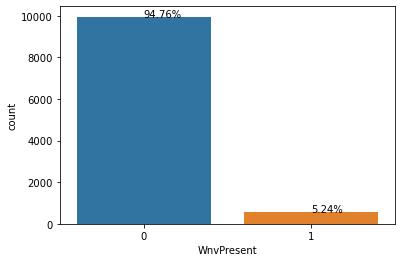

In [51]:
fig, ax = plt.subplots(1,1)
sns.countplot(x = weather_train_df['WnvPresent'])

#Add percentage numbers on the count plot
for i in ax.patches:
    height = i.get_height()
    ax.text(i.get_x()+i.get_width()/2,height,'{:.2f}{}'.format(height/len(train)*100,'%'))

Most mosquitos do not carry WNV on them. If we simply guessed the majority class, we would be right 94.76% of the time. However, the target is not a classification of whether or not the mosquito has WNV, but a number between 0-1 (i.e. probability) that it does.

### Part 2.2: Exploring correlated features between the dependent and independent variables

Let's draw a heatmap of correlated features

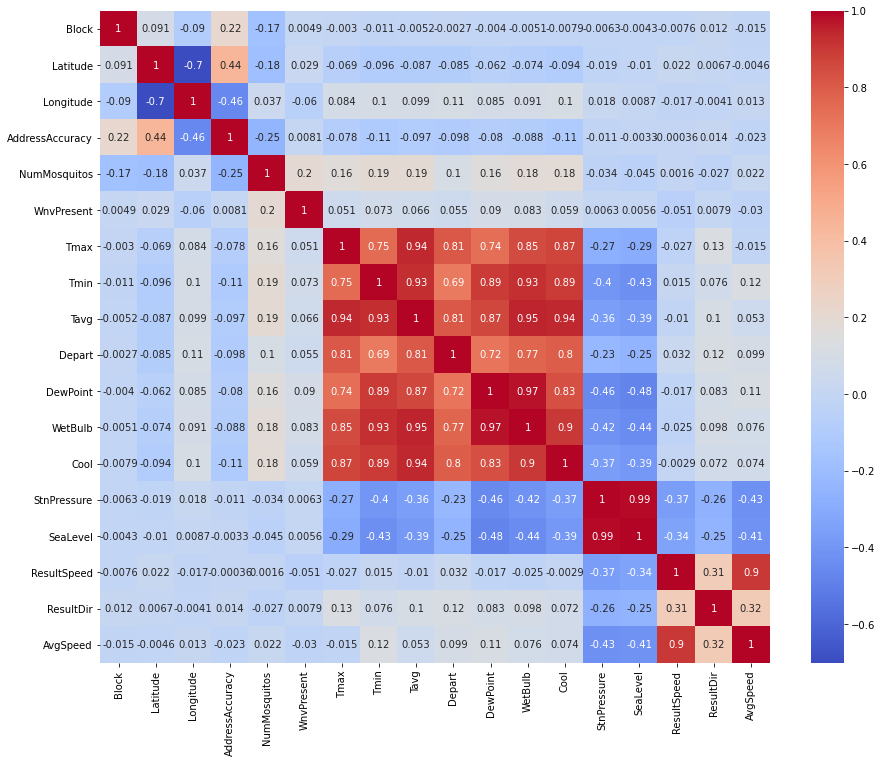

In [53]:
plt.figure(figsize=(15,12))
sns.heatmap(weather_train_df.corr(), annot=True, cmap = 'coolwarm');

The biggest point that stands out is the middle section, the large red rectangle. It shows that everything between 'Tmax' and 'Cool' are strongly correlated. This is not surprisingly, they're all related to temperatures.

'StnPressure' and 'SeaLevel' are correlated with one another, perhaps because the stations are located by the seaside or they measur the same thing. These 2 are negatively correlated with the temperature features to its left and the wind features to its right. This means the higher the wind speed and the higher the temperature, the lower the sea levels and the lower the station pressure.

'ResultSpeed' up to 'AvgSpeed' are all related to wind. 'ResultDir' is less correlated with the other two. This is because it measures wind direction, not wind speed.

Finally, the dependent variable 'WnvPresent' is not strongly correlated with any other variable.

Let's answer the following questions:

**Relationships between dependent and independent variables**

- Which addresses (including block, street, and address number) are most likely to get infected mosquitos?
- Which species of mosquito is most likely to be infected?
- Does sunrise and sunset time affect the number of (infected) mosquitos?
- Do the different weathers in 'CodeSum' have any relation to the number of (infected) mosquitos?
- Does wind speed have any effect on the number of (infected) mosquitos?
- Is DewPoint and WetBulb informative for predicting the number of (infected) mosquitos?

**Relationships between independent variables**

- Is StnPressure and SeaLevel an informative summary variable that can stand in for temperature and wind speeds? (i.e. how is it negatively correlated with temperature and wind speeds?)

The following analysis is heavily inspired by this kaggle notebook: [West Nile Virus Complete EDA](https://www.kaggle.com/vaibhavs2/west-nile-virus-complete-eda)

#### Question: Which addresses are most likely to get infected mosquitos?

In [53]:
weather_train_df.head()

,Address,Species,Block,Street,Trap,AddressNumberAndStreet,Latitude,Longitude,AddressAccuracy,NumMosquitos,...,Cool,Sunrise,Sunset,CodeSum,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed
Date,,,,,,,,,,,,,,,,,,,,,
2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX PIPIENS/RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9,1,...,9.0,0421,1917,BR HZ,0.00,29.39,30.11,5.8,18,6.5
2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9,1,...,9.0,0421,1917,BR HZ,0.00,29.39,30.11,5.8,18,6.5
2007-05-29,"6200 North Mandell Avenue, Chicago, IL 60646, USA",CULEX RESTUANS,62,N MANDELL AVE,T007,"6200 N MANDELL AVE, Chicago, IL",41.994991,-87.769279,9,1,...,9.0,0421,1917,BR HZ,0.00,29.39,30.11,5.8,18,6.5
2007-05-29,"7900 West Foster Avenue, Chicago, IL 60656, USA",CULEX PIPIENS/RESTUANS,79,W FOSTER AVE,T015,"7900 W FOSTER AVE, Chicago, IL",41.974089,-87.824812,8,1,...,9.0,0421,1917,BR HZ,0.00,29.39,30.11,5.8,18,6.5
2007-05-29,"7900 West Foster Avenue, Chicago, IL 60656, USA",CULEX RESTUANS,79,W FOSTER AVE,T015,"7900 W FOSTER AVE, Chicago, IL",41.974089,-87.824812,8,4,...,9.0,0421,1917,BR HZ,0.00,29.39,30.11,5.8,18,6.5


In [54]:
#Count the number of streets per block
x = weather_train_df.groupby(['Block'])['Street'].nunique().sort_values(ascending=False)

In [55]:
x

Block
10    9
11    9
22    6
13    4
21    4
     ..
47    1
46    1
45    1
43    1
48    1
Name: Street, Length: 64, dtype: int64

In [56]:
#Count the number of blocks per street type
x.value_counts()

1    27
2    20
3     9
4     5
9     2
6     1
Name: Street, dtype: int64

In [57]:
# Get the streets that are more likely to have infected mosquitos.
year = weather_train_df.index.year
x = weather_train_df.groupby([year,'Block','Street'])['WnvPresent'].sum()
y = weather_train_df.groupby([year,'Block','Street'])['Street'].count()

x

Date  Block  Street             
2007  10      E 67TH ST              2
              N CENTRAL PARK DR      0
              S CALIFORNIA AVE       0
              S COTTAGE GROVE        0
              S STONY ISLAND AVE    16
                                    ..
2013  89      S CARPENTER ST         2
              S MUSKEGON AVE         0
      90      W GARFIELD BLVD        4
      91      W HIGGINS RD           5
      96      S LONGWOOD DR          0
Name: WnvPresent, Length: 343, dtype: int64

In [58]:
pd.set_option('display.max_rows', None)

In [59]:
#Combine x and y together into a new dataframe, z
z = pd.concat([x,y], axis=1)
z['% Count'] = np.round(x/y,4)*100

z.index.rename(['Year','Block','StreetName'],inplace=True)
z.reset_index(inplace=True, )
z.set_index(['Block','StreetName'], inplace=True)
z.rename({'Stree':'Strt_Rec_Cnt'}, inplace=True)
z[z['% Count']>0].sort_values(by=['Year','% Count'], ascending=[True,False])

,,Year,WnvPresent,Street,% Count
Block,StreetName,,,,
40,E 130TH ST,2007,5,24,20.83
36,N PITTSBURGH AVE,2007,7,35,20.00
50,S UNION AVE,2007,6,30,20.00
65,N OAK PARK AVE,2007,6,31,19.35
72,N OKETO AVE,2007,7,39,17.95
60,N AVONDALE AVE,2007,4,24,16.67
41,N OAK PARK AVE,2007,8,49,16.33
60,W ROSCOE ST,2007,2,14,14.29
46,N MILWAUKEE AVE,2007,4,30,13.33


It seems 2007 and 2013 have more infections than the other years

#### Question: Which species of mosquito is most likely to be infected?

In [60]:
# Identifying Mosquito Species that are the most likely carriers of Virus.

#Compute a cross tabulation of 'species' and 'WnvPresent', saving it to a temporary 'tmp' variable
tmp = pd.crosstab(weather_train_df['Species'],weather_train_df['WnvPresent'],normalize='index')
tmp.reset_index(drop=True)
tmp.columns = ['WnvAbsent','WnvPresent']

tmp

,WnvAbsent,WnvPresent
Species,,
CULEX ERRATICUS,1.000000,0.000000
CULEX PIPIENS,0.911078,0.088922
CULEX PIPIENS/RESTUANS,0.944865,0.055135
CULEX RESTUANS,0.982117,0.017883
CULEX SALINARIUS,1.000000,0.000000
CULEX TARSALIS,1.000000,0.000000
CULEX TERRITANS,1.000000,0.000000


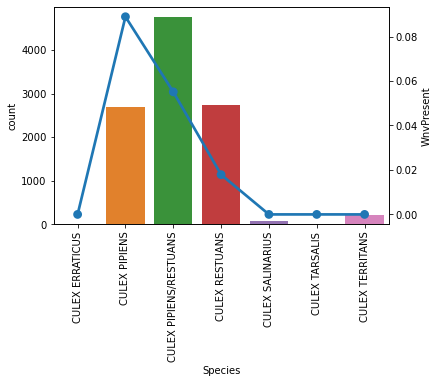

In [61]:
fig,ax = plt.subplots(1,1)

#Plot the frequency count of the various different mosquitos
g = sns.countplot(x = weather_train_df['Species'], ax=ax, order = list(tmp.index))
ax.tick_params(axis='x',rotation=90)

#twinx makes and returns a second y axes that shares the x-axis.
g2 = g.twinx()

#Plot a pointplot that shows the percentage of WnvPresent, overlayed on the frequency count 
sns.pointplot(x= tmp.index,y = tmp['WnvPresent'], ax=g2, order = list(tmp.index))
plt.show()

Let's get the rate of WNV infection per mosquito observed for better visualisation

In [75]:
#Group by species and grab the number of mosquitos and whether or not they have WNV
train_species = weather_train_df.groupby(['Species'], as_index = False)[['NumMosquitos', 'WnvPresent']].sum()

#Create a new 'number of mosquitos rate, standard deviation'
train_species['num_mos_std_rate']= train_species['WnvPresent']/train_species['NumMosquitos']
print(train_species)

                  Species  NumMosquitos  WnvPresent  num_mos_std_rate
0         CULEX ERRATICUS             7           0          0.000000
1           CULEX PIPIENS         44671         240          0.005373
2  CULEX PIPIENS/RESTUANS         66268         262          0.003954
3          CULEX RESTUANS         23431          49          0.002091
4        CULEX SALINARIUS           145           0          0.000000
5          CULEX TARSALIS             7           0          0.000000
6         CULEX TERRITANS           510           0          0.000000


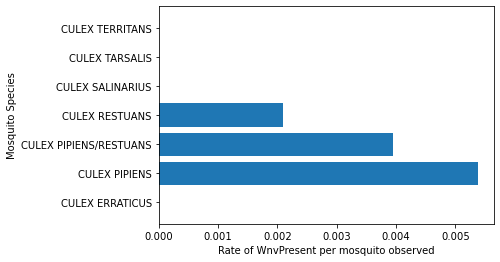

In [78]:
#Plot a bar graph
plt.barh(y=train_species['Species'],width=train_species['num_mos_std_rate'])
plt.xlabel('Rate of WnvPresent per mosquito observed')
plt.ylabel('Mosquito Species');

'Culex Pipiens' is either the 2nd or 3rd most common mosquito breeds, but contains the highest rate of infections. This means that 'Culex Pipiens' is the main carrier of WNV.

#### Question: Does sunrise and sunset time affect the number of (infected) mosquitos?

Exploring 'Sunset' timing

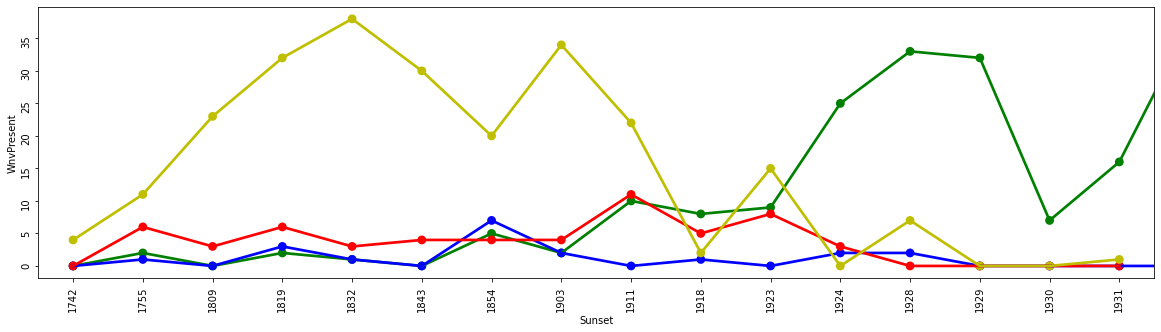

In [62]:
plt.figure(figsize=(20,5))

#Extract the year and 'sunset' and get the sum of 'WnvPresent'
tmp = weather_train_df.groupby([year,'Sunset'])['WnvPresent'].sum().reset_index()

#Plot the 'WnvPresent' vs 'year' for each year.

#2007 is plotted as a green line
sns.pointplot(x = tmp.loc[tmp['Date']==2007,'Sunset'], y = tmp['WnvPresent'],color='g',dodge=True)

#2009 is plotted as a blue line
sns.pointplot(x = tmp.loc[tmp['Date']==2009,'Sunset'], y = tmp['WnvPresent'],color='b')

#2011 is plotted as a red line
sns.pointplot(x = tmp.loc[tmp['Date']==2011,'Sunset'], y = tmp['WnvPresent'],color='r')

#2013 is plotted as a yellow line
sns.pointplot(x = tmp.loc[tmp['Date']==2013,'Sunset'], y = tmp['WnvPresent'],color='y')

plt.tick_params(rotation=90)
plt.show()

There doesn't seem to be any pattern involved in sunset timings for the number of infected mosquitos. However, this graph does give evidence to what we found above: That 2007 (green line) and 2013 (yellow line) have the most number of infections. 2009 (blue line) and 2011 (red line) seem to have had fewer numbers. Spraying was done in 2011 and 2013, so that would explain 2011's numbers. But if that were the case, then there should have been fewer infections in 2013 too, and 2009 data is still unexplained.

Exploring 'Sunrise' data

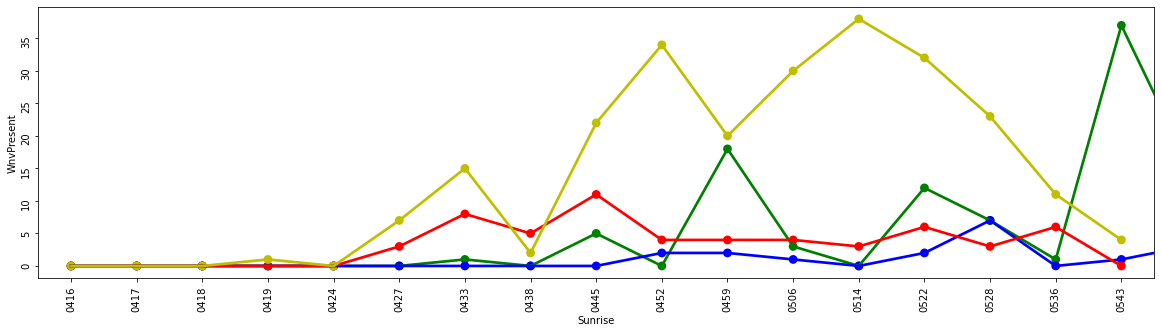

In [63]:
plt.figure(figsize=(20,5))

#Extract the year and 'sunset' and get the sum of 'WnvPresent'
tmp = weather_train_df.groupby([year,'Sunrise'])['WnvPresent'].sum().reset_index()

#Plot the 'WnvPresent' vs 'year' for each year.

#2007 is plotted as a green line
sns.pointplot(x = tmp.loc[tmp['Date']==2007,'Sunrise'], y = tmp['WnvPresent'],color='g',dodge=True)

#2009 is plotted as a blue line
sns.pointplot(x = tmp.loc[tmp['Date']==2009,'Sunrise'], y = tmp['WnvPresent'],color='b')

#2011 is plotted as a red line
sns.pointplot(x = tmp.loc[tmp['Date']==2011,'Sunrise'], y = tmp['WnvPresent'],color='r')

#2013 is plotted as a yellow line
sns.pointplot(x = tmp.loc[tmp['Date']==2013,'Sunrise'], y = tmp['WnvPresent'],color='y')

plt.tick_params(rotation=90)
plt.show()

Sunrise didn't have a pattern, but sunrise seems to have more infected mosquitos when the sun rises between 0445 and 0459. Beyond that there doesn't seem to be any rhyme or reason. There are many infections in 2013 when the sun rises at 0514, but very few in the other years. Similarly, 2007 has a great number of infections when the sun started rising at 0543, which is relatively late in this dataset.

#### Question: Do the different weathers in 'CodeSum' have any relation to the number of (infected) mosquitos?

In [64]:
tmp = pd.crosstab(weather_train_df['CodeSum'],weather_train_df['WnvPresent'],normalize='index')
tmp.reset_index()

tmp.head()

WnvPresent,0,1
CodeSum,,
,0.959100,0.040900
BR,0.927273,0.072727
BR HZ,0.802260,0.197740
DZ BR,1.000000,0.000000
HZ,0.975678,0.024322


Count of distinct weather condition: 19


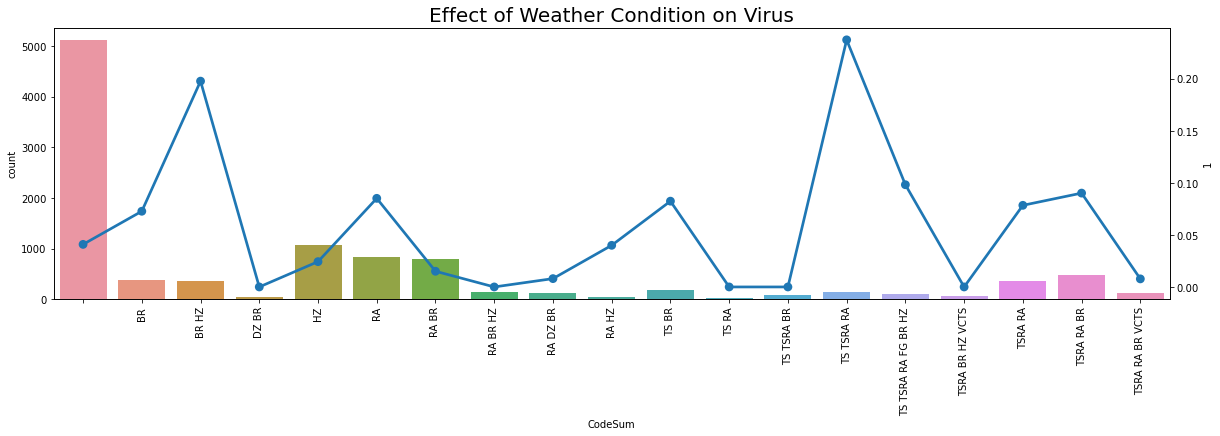

In [65]:
print(f'Count of distinct weather condition: {weather_train_df["CodeSum"].nunique()}')

fig, ax = plt.subplots(1,1, figsize=(20,5))

g = sns.countplot(x = weather_train_df['CodeSum'],order = list(tmp.index), ax =ax)
g.tick_params(axis='x',labelrotation=90)
g.set_title('Effect of Weather Condition on Virus', fontsize=20)

#Use twinx to get second y axis displaying percentage
g1 = g.twinx()

#Overlay a pointplot of the temporary 'tmp' df 
sns.pointplot(x = tmp.index,y = tmp[1], ax=g1)

plt.show()

A combination of 'TS TSRA RA', meaning 'Thunderstorm, Rain and thunderstorm, and Rain', had the most number of infected mosquitos. 'BR HZ' came next, meaning 'Mist, and haze', had the second most number of infected mosquitos. 

'RA', 'TS BR', 'TSRA RA' and 'TSRA RA BR' all closely share a 3rd most number of infected mosquitos. It seems that some combination of thunderstorm, rain, mist, and haze correlate with a higher number of infected mosquitos caught. Perhaps the cooler temperatures encourages them to venture out?

#### Question: Does wind speed have any effect on the number of (infected) mosquitos?

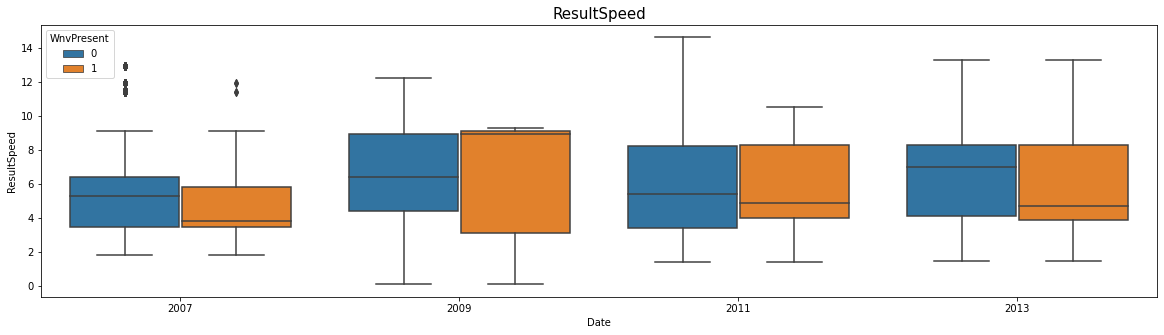

In [66]:
fig, (ax1) = plt.subplots(1,1, figsize=(20,5))

#Set up a boxplot with wind speed on the y axis, year on the x axis, and the WnvPresent as hue colours orange and blue
sns.boxplot(x = weather_train_df.index.year, y = weather_train_df['ResultSpeed'].replace(np.NaN,0.0).apply(float), hue = weather_train_df['WnvPresent'], ax=ax1)

ax1.set_title('ResultSpeed', fontdict= {'fontsize':15})
plt.show()

Most infected mosquitos were caught in traps when wind speeds were lower (the black line on the '1' orange box, representing median number, is lower than the black line on the '0' blue box). The only exception is 2009, where the median for the number of infected mosquitos is at the top of the box. However, even in this case, the wind speeds were slower than they were faster, as can be seen from the range line.

#### Question: Is DewPoint and WetBulb informative for predicting the number of (infected) mosquitos?

In [67]:
tmp_dew = pd.crosstab(weather_train_df['DewPoint'],weather_train_df['WnvPresent'],normalize='index')
tmp_dew.reset_index()

tmp_bulb = pd.crosstab(weather_train_df['WetBulb'],weather_train_df['WnvPresent'],normalize='index')
tmp_bulb.reset_index();

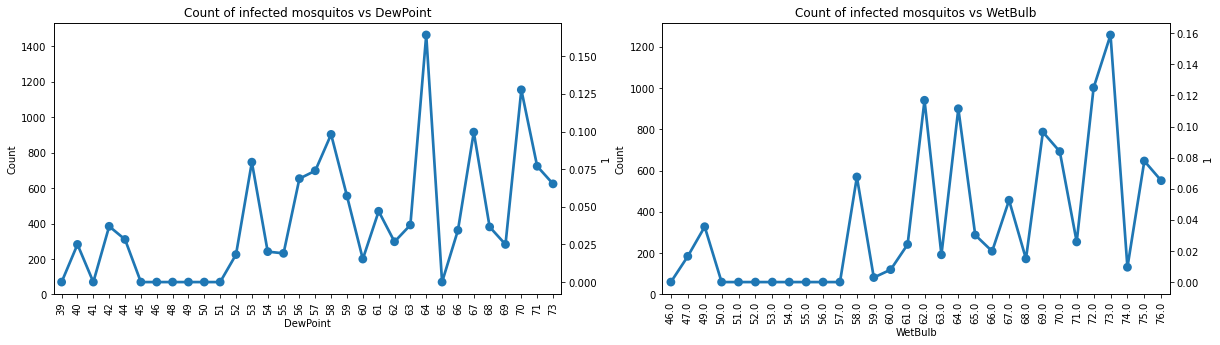

In [68]:
fig, ax = plt.subplots(1,2, figsize=(20,5))

#Plot the count of infected mosquitos vs DewPoint
g = sns.histplot(weather_train_df['DewPoint'], ax=ax[0])
g.tick_params(axis='x',labelrotation=90)

#Use twinx to get second y axis of percentage count
g1 = g.twinx()

ax[0].set_title('Count of infected mosquitos vs DewPoint')

#Plot pointplot
sns.pointplot(x = tmp_dew.index,y = tmp_dew[1], ax=g1)

#Do the same for count of infected mosquitos vs WetBulb
h = sns.histplot(weather_train_df['WetBulb'].dropna(), ax=ax[1])
h.tick_params(axis='x',labelrotation=90)
h1 = h.twinx()
ax[1].set_title('Count of infected mosquitos vs WetBulb')

sns.pointplot(x = tmp_bulb.index,y = tmp_bulb[1], ax= h1)

plt.show()

## ANALYSIS HERE

#### Question: Is StnPressure and SeaLevel an informative summary variable that can stand in for temperature and wind speeds? (i.e. how is it negatively correlated with temperature and wind speeds?)

In [69]:
weather_train_df.head()

,Address,Species,Block,Street,Trap,AddressNumberAndStreet,Latitude,Longitude,AddressAccuracy,NumMosquitos,...,Cool,Sunrise,Sunset,CodeSum,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed
Date,,,,,,,,,,,,,,,,,,,,,
2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX PIPIENS/RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9,1,...,9.0,0421,1917,BR HZ,0.00,29.39,30.11,5.8,18,6.5
2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9,1,...,9.0,0421,1917,BR HZ,0.00,29.39,30.11,5.8,18,6.5
2007-05-29,"6200 North Mandell Avenue, Chicago, IL 60646, USA",CULEX RESTUANS,62,N MANDELL AVE,T007,"6200 N MANDELL AVE, Chicago, IL",41.994991,-87.769279,9,1,...,9.0,0421,1917,BR HZ,0.00,29.39,30.11,5.8,18,6.5
2007-05-29,"7900 West Foster Avenue, Chicago, IL 60656, USA",CULEX PIPIENS/RESTUANS,79,W FOSTER AVE,T015,"7900 W FOSTER AVE, Chicago, IL",41.974089,-87.824812,8,1,...,9.0,0421,1917,BR HZ,0.00,29.39,30.11,5.8,18,6.5
2007-05-29,"7900 West Foster Avenue, Chicago, IL 60656, USA",CULEX RESTUANS,79,W FOSTER AVE,T015,"7900 W FOSTER AVE, Chicago, IL",41.974089,-87.824812,8,4,...,9.0,0421,1917,BR HZ,0.00,29.39,30.11,5.8,18,6.5


## Section 3: Feature Engineering

## Everything below this is work in progress

In [312]:
#Set general plot properties
sns.set_style("white")
sns.set_context({"figure.figsize": (24, 10)})

#Plot 1 - background - "total" (top) series
sns.barplot(x="species", y="num_observations", data=bar_species1, color = 'r')

#Plot 2 - overlay - "bottom" series
bottom_plot = sns.barplot(x="species", y="observations_with_wnv", data= bar_species1, color = 'b')
topbar = plt.Rectangle((0,0),1,1,fc="red", edgecolor = 'none')
bottombar = plt.Rectangle((0,0),1,1,fc='#0000A3',  edgecolor = 'none')
l = plt.legend([bottombar, topbar], ['total number of observations with wnv', 'total number of observations'], loc=1, ncol = 2, prop={'size':16})
l.draw_frame(False)

#Optional code - Make plot look nicer
sns.despine(left=True)
bottom_plot.set_ylabel("Observations")
bottom_plot.set_xlabel("Species")

#Set fonts to consistent 16pt size
for item in ([bottom_plot.xaxis.label, bottom_plot.yaxis.label] +
             bottom_plot.get_xticklabels() + bottom_plot.get_yticklabels()):
    item.set_fontsize(16)

NameError: name 'bar_species1' is not defined

In [321]:
train[train.NumMosquitos == 50]
train.groupby(['Trap', 'Species'], as_index=False)['NumMosquitos'].sum().sort_values('NumMosquitos', ascending=False).head()

train = pd.merge(train, train.groupby(['Trap', 'Species'], as_index=False)['NumMosquitos'].sum(), how='left', on=['Trap', 'Species'])

train.columns = ['Date', 'Address', 'Species', 'Block', 'Street', 'Trap',
       'AddressNumberAndStreet', 'Latitude', 'Longitude', 'AddressAccuracy',
       'NumMosquitos', 'WnvPresent', 'Tot_Mos_Species_Day']

train['Year'] = train.year
#only take into account the year from date

AttributeError: 'DataFrame' object has no attribute 'NumMosquitos'

Let's look at the trap locations by superimposing them as markers on the provided map of the City of Chicago

In [63]:
#Load the map and trap locations from the respective csvs
mapdata = np.loadtxt("../assets/west_nile/input/mapdata_copyright_openstreetmap_contributors.txt")
traps = pd.read_csv('../assets/west_nile/input/train.csv')[['Date', 'Trap','Longitude', 'Latitude', 'WnvPresent']]

The following heatmap code is taken, with modification, from [West Nile heatmap notebook](https://www.kaggle.com/vascovv/west-nile-heatmap)

In [127]:
#Save the traps with WNV infected mosquitos as sigthings
sigthings = traps[traps['WnvPresent'] > 0]

sigthings = sigthings.groupby(['Date', 'Trap','Longitude', 'Latitude']).max()['WnvPresent'].reset_index()
sigthings

,Date,Trap,Longitude,Latitude,WnvPresent
0,2007-07-18,T215,-87.531635,41.686398,1
1,2007-07-25,T115,-87.599862,41.673408,1
2,2007-08-01,T002,-87.800991,41.954690,1
3,2007-08-01,T008,-87.777921,42.008314,1
4,2007-08-01,T015,-87.824812,41.974089,1
...,...,...,...,...,...
380,2013-09-19,T900,-87.890615,41.974689,1
381,2013-09-26,T003,-87.757639,41.964242,1
382,2013-09-26,T035,-87.742302,41.763733,1
383,2013-09-26,T155,-87.778927,41.776156,1


In [117]:
#Get the Longitude and Latitude in sigthings
X = sigthings[['Longitude', 'Latitude']].values

#Instantiate and fit a Kernel Density Estimator onto X to estimate probability density of X
kd = KernelDensity(bandwidth=0.02)
kd.fit(X)

KernelDensity(bandwidth=0.02)

In [122]:
#Determine the x and y values for the map
xv,yv = np.meshgrid(np.linspace(-88, -87.5, 100), np.linspace(41.6, 42.1, 100))
gridpoints = np.array([xv.ravel(),yv.ravel()]).T

# Evaluate the log density model on the gridpoints data and reshape it to a 2d matrix.
zv = np.exp(kd.score_samples(gridpoints).reshape(100,100))
zv

array([[3.74089244e-43, 7.53114896e-42, 1.61949929e-40, ...,
        2.88701443e-02, 1.95077673e-02, 1.23688539e-02],
       [2.69400707e-42, 4.45709252e-41, 7.50634991e-40, ...,
        5.93858758e-02, 4.01412690e-02, 2.54611507e-02],
       [2.24294937e-41, 3.42665544e-40, 5.07492332e-39, ...,
        1.14875449e-01, 7.76849707e-02, 4.93000107e-02],
       ...,
       [5.83586523e-12, 1.41489573e-11, 3.30511772e-11, ...,
        4.94705506e-19, 6.68758058e-20, 8.48214580e-21],
       [1.08436923e-12, 2.65515615e-12, 6.29334593e-12, ...,
        1.31151190e-19, 1.77291175e-20, 2.24860160e-21],
       [1.89733761e-13, 4.70057268e-13, 1.13310845e-12, ...,
        3.26220362e-20, 4.40983825e-21, 5.59297681e-22]])

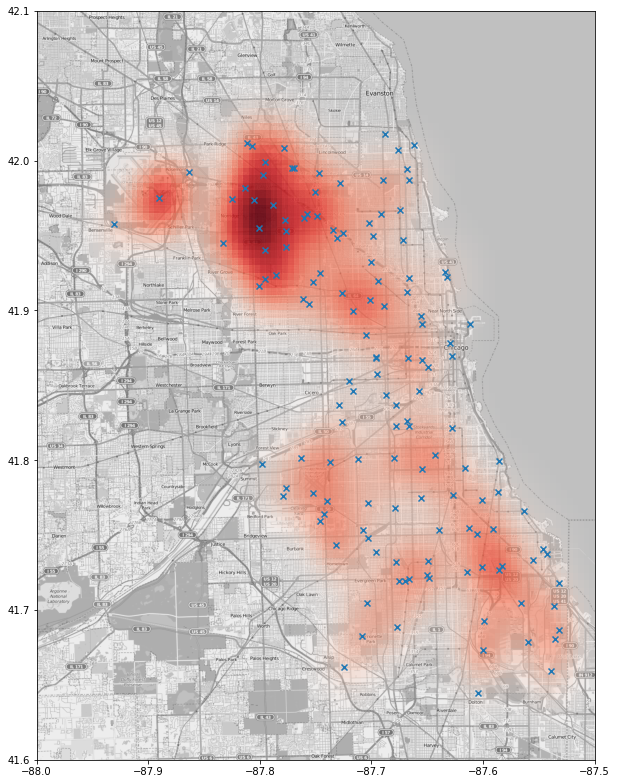

In [98]:
plt.figure(figsize=(10,14))

#Plot the traps on the map
plt.imshow(mapdata, 
           cmap=plt.get_cmap('gray'), 
           extent=lon_lat_box, 
           aspect=aspect)

#Plot the kernel density
plt.imshow(zv, 
           origin='lower', 
           cmap=alpha_cm, 
           extent=lon_lat_box, 
           aspect=aspect)

#Get the locations of the traps
locations = traps[['Longitude', 'Latitude']].drop_duplicates().values

#Plot the trap locations
plt.scatter(locations[:,0], locations[:,1], marker='x')

#Save the file into the assets folder holding the data
plt.savefig('../assets/west_nile/input/heatmap.png');

The traps seem to stem from a 'source' from the east side of Chicago.

Now let's look at how weather affects the number of mosquitos

The following rows about weather is taken from [this kaggle notebook](https://www.kaggle.com/kobiyashimaru/west-nile-virus-basic-eda-with-maps), with my comments to show what is happening

In [139]:
weather['Tavg'].unique()

array(['67', '68', '51', '52', '56', '58', 'M', '60', '59', '65', '70',
       '69', '71', '61', '55', '57', '73', '72', '53', '62', '63', '74',
       '75', '78', '76', '77', '66', '80', '64', '81', '82', '79', '85',
       '84', '83', '50', '49', '46', '48', '45', '54', '47', '44', '40',
       '41', '38', '39', '42', '37', '43', '86', '87', '89', '92', '88',
       '91', '93', '94', '90', '36'], dtype=object)

There's an 'M' mixed with the numbers. This makes the data difficult to use.

In [140]:
weather[weather['Tavg']=='M']

,Station,Date,Tmax,Tmin,Tavg,Depart,DewPoint,WetBulb,Heat,Cool,...,CodeSum,Depth,Water1,SnowFall,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed
7,2,2007-05-04,78,51,M,M,42,50,M,M,...,,M,M,M,0.00,29.36,30.04,10.1,7,10.4
505,2,2008-07-08,86,46,M,M,68,71,M,M,...,TS RA,M,M,M,0.28,29.16,29.80,7.4,24,8.3
675,2,2008-10-01,62,46,M,M,41,47,M,M,...,,M,M,M,0.00,29.30,29.96,10.9,33,11.0
1637,2,2011-07-22,100,71,M,M,70,74,M,M,...,TS TSRA BR,M,M,M,0.14,29.23,29.86,3.8,10,8.2
2067,2,2012-08-22,84,72,M,M,51,61,M,M,...,,M,M,M,0.00,29.39,M,4.7,19,M
2211,2,2013-05-02,71,42,M,M,39,45,M,M,...,,M,M,M,0.00,29.51,30.17,15.8,2,16.1
2501,2,2013-09-24,91,52,M,M,48,54,M,M,...,,M,M,M,0.00,29.33,30.00,5.8,9,7.7
2511,2,2013-09-29,84,53,M,M,48,54,M,M,...,RA BR,M,M,M,0.22,29.36,30.01,6.3,36,7.8
2525,2,2013-10-06,76,48,M,M,44,50,M,M,...,RA DZ BR,M,M,M,0.06,29.10,29.76,10.1,25,10.6
2579,2,2014-05-02,80,47,M,M,43,47,M,M,...,RA,M,M,M,0.04,29.10,29.79,10.7,23,11.9


There are 11 rows out of 2811 rows containing 'M'. For ease of use, let's drop these rows.

In [141]:
#Dropping the 'M' rows
weather.drop(weather[weather['Tavg']=='M'].index, axis = 0, inplace = True)

In [142]:
weather.reset_index(drop=True)

,Station,Date,Tmax,Tmin,Tavg,Depart,DewPoint,WetBulb,Heat,Cool,...,CodeSum,Depth,Water1,SnowFall,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed
0,1,2007-05-01,83,50,67,14,51,56,0,2,...,,0,M,0.0,0.00,29.10,29.82,1.7,27,9.2
1,2,2007-05-01,84,52,68,M,51,57,0,3,...,,M,M,M,0.00,29.18,29.82,2.7,25,9.6
2,1,2007-05-02,59,42,51,-3,42,47,14,0,...,BR,0,M,0.0,0.00,29.38,30.09,13.0,4,13.4
3,2,2007-05-02,60,43,52,M,42,47,13,0,...,BR HZ,M,M,M,0.00,29.44,30.08,13.3,2,13.4
4,1,2007-05-03,66,46,56,2,40,48,9,0,...,,0,M,0.0,0.00,29.39,30.12,11.7,7,11.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2928,2,2014-10-29,49,40,45,M,34,42,20,0,...,,M,M,M,0.00,29.42,30.07,8.5,29,9.0
2929,1,2014-10-30,51,32,42,-4,34,40,23,0,...,,0,M,0.0,0.00,29.34,30.09,5.1,24,5.5
2930,2,2014-10-30,53,37,45,M,35,42,20,0,...,RA,M,M,M,T,29.41,30.10,5.9,23,6.5
2931,1,2014-10-31,47,33,40,-6,25,33,25,0,...,RA SN,0,M,0.1,0.03,29.49,30.20,22.6,34,22.9


In [143]:
#Check the columns
weather.columns

Index(['Station', 'Date', 'Tmax', 'Tmin', 'Tavg', 'Depart', 'DewPoint',
       'WetBulb', 'Heat', 'Cool', 'Sunrise', 'Sunset', 'CodeSum', 'Depth',
       'Water1', 'SnowFall', 'PrecipTotal', 'StnPressure', 'SeaLevel',
       'ResultSpeed', 'ResultDir', 'AvgSpeed'],
      dtype='object')

In [144]:
#Change the average Temperature column to 'int'
weather['Tavg'] = weather['Tavg'].astype(int) 

In [145]:
weather_imp = weather.groupby(['Date'], as_index = False)[['Tavg']].mean()

In [146]:
weather_imp

,Date,Tavg
0,2007-05-01,67.5
1,2007-05-02,51.5
2,2007-05-03,57.0
3,2007-05-04,58.0
4,2007-05-05,60.0
...,...,...
1467,2014-10-27,65.5
1468,2014-10-28,57.0
1469,2014-10-29,44.0
1470,2014-10-30,43.5


In [147]:
mosquitos_date_wise = train.groupby(['Date'], as_index = False)[['NumMosquitos']].sum()
wnv_date_wise = train.groupby(['Date'], as_index = False)[['WnvPresent']].sum()

In [148]:
wnv_mosquitos_dw = pd.merge(mosquitos_date_wise,wnv_date_wise, on = 'Date')
weather_df = pd.merge(wnv_mosquitos_dw, weather_imp)

In [149]:
weather_df

,Date,NumMosquitos,WnvPresent,Tavg
0,2007-05-29,40,0,75.5
1,2007-06-05,127,0,56.5
2,2007-06-26,216,0,81.5
3,2007-06-29,85,0,63.5
4,2007-07-02,240,0,67.0
...,...,...,...,...
90,2013-08-29,2645,38,78.0
91,2013-09-06,2510,32,73.0
92,2013-09-12,2210,23,72.5
93,2013-09-19,1030,11,77.0


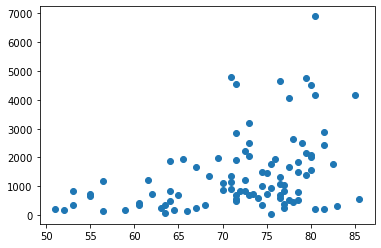

In [81]:
fig = plt.scatter(x = weather_df['Tavg'], y = weather_df['NumMosquitos'])

plt.show()

In [82]:
alpha_cm = plt.cm.Reds
alpha_cm._init()
alpha_cm._lut[:-3,-1] = abs(np.logspace(0, 1, alpha_cm.N) / 10 - 1)[::-1]
aspect = mapdata.shape[0] * 1.0 / mapdata.shape[1]
lon_lat_box = (-88, -87.5, 41.6, 42.1)

